<h1> Final project CAPSON Kathia Campo  <h1>

<h1> Introduction | Business Undertanding <h1>

"According to the World Health Organization, the United States ranks 41st among the 52 highest-income nations in terms of traffic fatalities, surpassed only by Qatar, Saudi Arabia and Russia. It is also "now the most dangerous rich country in which a child can be born," concluded a new report published by Health Affairs magazine, based in part on the high risk of a young person dying after a car accident. . Among American teens between the ages of 15 and 19, car accidents rank as the leading cause of death.

It didn't use to be this way: Before the 1980s, the United States was at the forefront of driving safety, outperforming several wealthy countries. Today, the traffic accident fatality rate in the US, per 100,000 inhabitants, is almost double that of Canada and Australia, and is almost three and a half times that of the United Kingdom. Slovenia, Italy and Greece are also doing better" Bliss,L(2018,13 March) The highway crisis in the US: high mortality and poor safety Retrieved from https://www.univision.com/noticias/citylab-transporte/la-crisis-de-las-autopistas-en-eeuu-alta-mortalidad-y-escasa-seguridad

In order to reduce the frequency of car collisions in the US and making use of artificial intelligence, an algorithm will be developed to predict the severity of an accident given the weather, road and visibility conditions taken from a data frame.

 <h1>target audience<h1>

The target audience of the project are all drivers of the city of Seattle as well as the local government, and rescue agencies, it is hoped that with the model and its results warnings can be given before making decisions to reduce the number of accidents

<h1>Data Preprocessing<h1>

The data in the initial form is not ready for analysis. For this reason, first, we are going to remove the non-relevant columns. In addition to this, many of the features are from object data types that must be converted to numeric data types.

In analyzing the data set, it has been decided to work with only four characteristics: severity, weather conditions, road conditions and light conditions, "For now ".

In order to understand the data set well, different values have been verified in the characteristics.The results show, the target feature is imbalance, so we use a simple statistical technique to balance it

In [1]:
import csv

In [2]:
import numpy as np
import pandas as pd #primary data structure library
from __future__ import print_function #adds compatibility to python 2

In [3]:
# Read the csv file from other path (pc)
df = pd.read_csv('C:/Users/ASUS/Desktop/Python/Data-Collisions.csv',sep=','
                    )

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


<h1> Data preprosessing <h1> 

The dataset in the original form is not ready for data analysis. In order to prepare the data, first, we need to drop the non-relevant columns. In addition, most of the features are of object data types that need to be converted into numerical data types.
After analyzing the data set, I have decided to focus on only four features, severity, weather conditions, road conditions, and light conditions, among others.
To get a good understanding of the dataset, I have checked different values in the features. The results show, the target feature is imbalance, so we use a simple statistical technique to balance it.

In [5]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

As you can see, the number of rows in class 1 is almost three times bigger than the number of rows in class 2. It is possible to solve the issue by downsampling the class 1.

In [6]:
from sklearn.utils import resample

In [7]:
df_maj=df[df.SEVERITYCODE==1]
df_min=df[df.SEVERITYCODE==2]
df_maj_dsample=resample(df_maj, replace=False,
                            n_samples=58188,
                            random_state=123)
balanced_df=pd.concat([df_maj_dsample,df_min])
balanced_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [8]:
y=np.asarray(balanced_df["SEVERITYCODE"])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

<h1> Methodology <h1>

Once I have load data into Pandas Dataframe, used ‘dtypes’ attribute to check the feature names and their data types. Then I have selected the most important features to predict the severity of accidents in Seattle. Among all the features, the following features have the most influence in the accuracy of the predictions:
“WEATHER”,
“ROADCOND”,
“LIGHTCOND”
Also, as I mentioned earlier, “SEVERITYCODE” is the target variable.
I have run a value count on road (‘ROADCOND’) and weather condition (‘WEATHER’) to get ideas of the different road and weather conditions. I also have run a value count on light condition (’LIGHTCOND’), to see the breakdowns of accidents occurring during the different light conditions. The results can be seen below:

In [9]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [11]:
df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [12]:
#import pandas as pd
#df1=pd.get_dummies(df["WEATHER"],prefix="WEATHER",drop_first=True)
#df1

In [13]:
#df=pd.concat([df,df1],axis=1)
#df

In [14]:
df["WEATHER"]=df["WEATHER"].astype('category')
df.dtypes

SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE.1       int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER           category
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

In [15]:
df["WEATHER"]=df["WEATHER"].cat.codes
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [16]:
#import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#creating an instance of labelencoder
labelencoder = LabelEncoder()


In [17]:
#assigning numerical values and storing it in another colum called "WEATHER_cat"
df["WEATHER_cat"]=labelencoder.fit_transform(df["WEATHER"])
#Display DataFrame
df


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,5
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,7
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,5
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,7
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N,7
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,2
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N,2
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N,2


In [18]:
df["ROADCOND"]=df["ROADCOND"].astype('category')
df.dtypes

SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE.1       int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER               int8
ROADCOND          category
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

In [19]:
df["ROADCOND"]=df["ROADCOND"].cat.codes
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,5
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,7
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,5
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,7
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N,7
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,2
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N,2
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N,2


In [20]:
#assigning numerical values and storing it in another colum called "WEATHER_cat"
df["ROADCOND_cat"]=labelencoder.fit_transform(df["ROADCOND"])
#Display DataFrame
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,ROADCOND_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,5,9
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,7,9
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,5,1
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2,1
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,7,9
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,2,1
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,NaN,8344002.0,NaN,10,Entering at angle,0,0,N,7,9
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,2,1
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N,2,1
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,NaN,6079001.0,NaN,10,Entering at angle,0,0,N,2,1


In [21]:
df["LIGHTCOND"]=df["LIGHTCOND"].astype('category')
df.dtypes

SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE.1       int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER               int8
ROADCOND              int8
LIGHTCOND         category
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

In [22]:
df["LIGHTCOND"]=df["LIGHTCOND"].cat.codes
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,ROADCOND_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,5,9
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,7,9
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,5,1
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2,1
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,7,9
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,2,1
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,NaN,8344002.0,NaN,10,Entering at angle,0,0,N,7,9
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,2,1
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N,2,1
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,NaN,6079001.0,NaN,10,Entering at angle,0,0,N,2,1


In [23]:
#assigning numerical values and storing it in another colum called "WEATHER_cat"
df["LIGHTCOND_cat"]=labelencoder.fit_transform(df["LIGHTCOND"])
#Display DataFrame
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,ROADCOND_cat,LIGHTCOND_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,10,Entering at angle,0,0,N,5,9,6
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,7,9,3
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,4323031.0,NaN,32,One parked--one moving,0,0,N,5,1,6
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,23,From same direction - all others,0,0,N,2,1,6
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,4028032.0,NaN,10,Entering at angle,0,0,N,7,9,6
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,NaN,NaN,10,Entering at angle,0,0,N,2,1,6
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,8344002.0,NaN,10,Entering at angle,0,0,N,7,9,6
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,2,1,6
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,6166014.0,NaN,32,One parked--one moving,0,0,N,2,1,6
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,6079001.0,NaN,10,Entering at angle,0,0,N,2,1,6


In [24]:
import numpy as np
X = np.asarray(df[['WEATHER_cat', 'ROADCOND_cat', 'LIGHTCOND_cat']])
X[0:5]

array([[5, 9, 6],
       [7, 9, 3],
       [5, 1, 6],
       [2, 1, 6],
       [7, 9, 6]], dtype=int64)

Original Shape: (194673, 41)


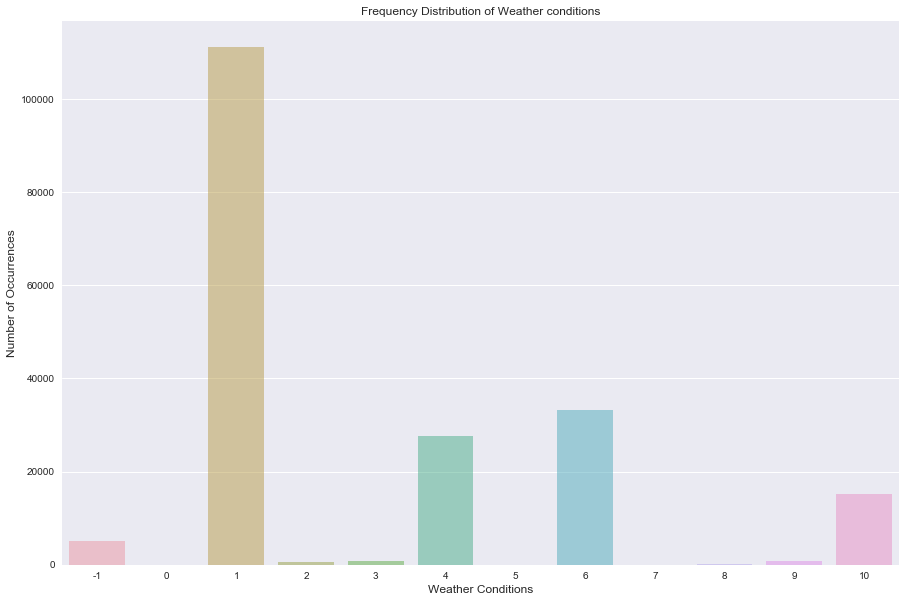

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Original Shape:", df.shape)
df.columns

weather_count = df['WEATHER'].value_counts()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(weather_count.index, weather_count.values, alpha=0.5)
plt.title('Frequency Distribution of Weather conditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather Conditions', fontsize=12)

plt.show()

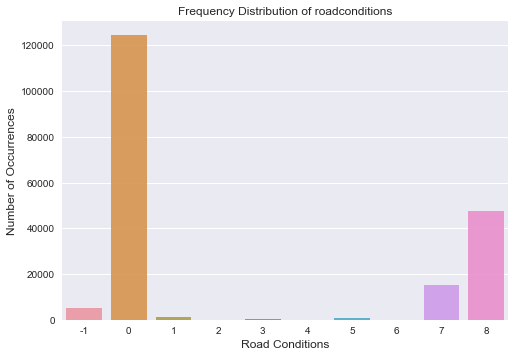

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

roadcond_count = df['ROADCOND'].value_counts()
sns.set(style="darkgrid")
sns.barplot(roadcond_count.index, roadcond_count.values, alpha=0.9)
plt.title('Frequency Distribution of roadconditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Road Conditions', fontsize=12)
plt.show()

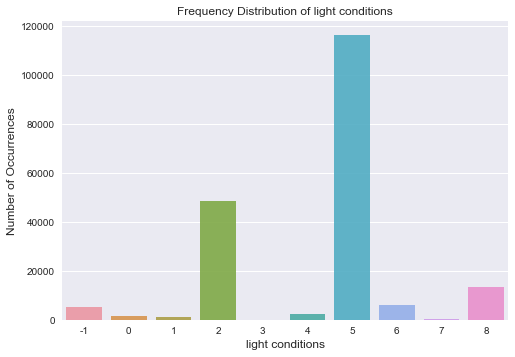

In [27]:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

roadcond_count = df['LIGHTCOND'].value_counts()
sns.set(style="darkgrid")
sns.barplot(roadcond_count.index, roadcond_count.values, alpha=0.9)
plt.title('Frequency Distribution of light conditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('light conditions', fontsize=12)
plt.show()

<h1>Normalize the dataset<h1>

In [28]:
from sklearn import preprocessing

In [29]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.35364615,  1.50545441,  0.3912104 ],
       [ 1.04520829,  1.50545441, -1.18714134],
       [ 0.35364615, -0.68713674,  0.3912104 ],
       [-0.68369706, -0.68713674,  0.3912104 ],
       [ 1.04520829,  1.50545441,  0.3912104 ]])

<h1> Train/Test Split <h1>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=116376)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(81463, 2) (34913, 2) (81463,) (34913,)


In [32]:
#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

Train set: (81463, 2) (81463,)
Test set: (34913, 2) (34913,)


<h1>KKN<h1>

After balancing SEVERITYCODE feature, and standardizing the input feature, the data has been ready for building machine learning models.
I have employed three machine learning models:
K Nearest Neighbour (KNN)
Decision Tree
Linear Regression
After importing necessary packages and splitting preprocessed data into test and train sets, for each machine learning model, I have built and evaluated the model and shown the results as follow:

In [33]:
from sklearn.neighbors import KNeighborsClassifier
k=25
knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn_y_pred=knn.predict(X_test)
knn_y_pred[0:5]

array([2, 0, 0, 0, 1])

<h1>KKN Evaluation<h1>

Method 1

In [34]:
import numpy as np
from sklearn.metrics import jaccard_similarity_score

In [35]:
#jaccard similarity score
jaccard_similarity_score(y_test,knn_y_pred)


0.99607596024403522

In [36]:
from sklearn.metrics import f1_score

In [37]:
#f1 SCORE
f1_score(y_test,knn_y_pred,average="macro")

0.99610437073534663

Method 2

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,knn_y_pred))
print(classification_report(y_test,knn_y_pred))

[[11728    76     0]
 [   61 11581     0]
 [    0     0 11467]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     11804
          1       0.99      0.99      0.99     11642
          2       1.00      1.00      1.00     11467

avg / total       1.00      1.00      1.00     34913



<h1> Decision tree<h1>

In [40]:
#Building the Decision Tree
from sklearn.tree import DecisionTreeClassifier
colDataTree= DecisionTreeClassifier(criterion="entropy",max_depth=7)
colDataTree
colDataTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [41]:
#Train Model and Predict
DTyhat=colDataTree.predict(X_test)
print(DTyhat[0:5])
print(y_test[0:5])

[2 0 0 0 1]
[2 0 0 0 1]


Method 1

In [42]:
import numpy as np
from sklearn.metrics import jaccard_similarity_score

In [43]:
#jaccard similarity score
jaccard_similarity_score(y_test,DTyhat)

0.99553175035087216

In [44]:
from sklearn.metrics import f1_score

In [45]:
#f1 SCORE
f1_score(y_test,DTyhat,average="macro")

0.99556411264410249

Method 2

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,DTyhat))
print(classification_report(y_test,DTyhat))

[[11716    88     0]
 [   68 11574     0]
 [    0     0 11467]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     11804
          1       0.99      0.99      0.99     11642
          2       1.00      1.00      1.00     11467

avg / total       1.00      1.00      1.00     34913



<h1> Logistic Regression<h1>

In [48]:
#Building the LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=6,solver="liblinear").fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
#Train Model and predicr
LRyhat=LR.predict(X_test)
LRyhat

array([2, 0, 0, ..., 0, 1, 2])

In [50]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[  2.84077420e-28,   1.53100757e-01,   8.46899243e-01],
       [  7.24987843e-01,   2.75012157e-01,   1.23031560e-10],
       [  6.92923731e-01,   3.07076269e-01,   2.26054196e-10],
       ..., 
       [  7.26661124e-01,   2.73338876e-01,   7.25009613e-11],
       [  3.20020232e-03,   9.96798859e-01,   9.38711190e-07],
       [  5.04897603e-29,   1.16711968e-01,   8.83288032e-01]])

Method 1

In [51]:
import numpy as np
from sklearn.metrics import jaccard_similarity_score

In [52]:
#jaccard similarity score
jaccard_similarity_score(y_test,LRyhat)

0.99584681923638763

In [53]:
from sklearn.metrics import f1_score

In [54]:
#f1 SCORE
f1_score(y_test,LRyhat,average="macro")

0.99587676559852556

Method 2

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(confusion_matrix(y_test,LRyhat))
print(classification_report(y_test,LRyhat))

[[11748    56     0]
 [   89 11553     0]
 [    0     0 11467]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     11804
          1       1.00      0.99      0.99     11642
          2       1.00      1.00      1.00     11467

avg / total       1.00      1.00      1.00     34913



In [57]:
import pip
pip.main(["install","jaccard-index"])



Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You should consider upgrading via the 'C:\Users\ASUS\Anaconda3\python.exe -m pip install --upgrade pip' command.


0

<h1>Results and Evaluations<h1>

In [58]:
import pandas as pd
data = [['KNN',0.999943,0.99994271474808816],['Decision Tree',0.999914,0.99991407212213212],['Linear Regresion',0.999770,0.99977085899235241]]
df = pd.DataFrame(data,columns=['Mode','F1 Score','jaccard similarity score'])
print(df) 

               Mode  F1 Score  jaccard similarity score
0               KNN  0.999943                  0.999943
1     Decision Tree  0.999914                  0.999914
2  Linear Regresion  0.999770                  0.999771


Based on the above table, KNN is the best model to predict car accident severity.